In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lzma
import pickle

from matplotlib.lines import Line2D

In [2]:
load_Dir = "../Data/"

In [3]:
file_name = "DF_ensemble.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    data_frame = pickle.load(f)
data_frame[r"$\rho$"] = data_frame["M"]
data_frame[r"$\delta$"] = data_frame["S"]

In [4]:
data_frame.iloc[:5,0:15]

,init,graph_type,$N$,$d$,$\lambda$,s_type,S,o_type,M,iter_space,seed,tol,n_iter,obs_type,snap_time
0,rnd,rrg,20000,5,1.0,delta,0.5,rho,0.000,100,7,0.00001,100,sensors,-1
1,rnd,rrg,20000,5,1.0,delta,0.5,rho,0.000,100,7,0.00001,100,sensors,-1
2,rnd,rrg,20000,5,1.0,delta,0.5,rho,0.875,100,10,0.00001,100,sensors,-1
3,rnd,rrg,20000,5,1.0,delta,0.5,rho,0.875,100,10,0.00001,100,sensors,-1
4,rnd,rrg,20000,3,1.0,delta,0.5,rho,0.625,100,3,0.00001,100,sensors,-1


In [5]:
data_frame["c"].unique()

array([-1.,  0.,  1.])

In [6]:
sns.set_theme(style="whitegrid",font_scale=1.3)

<Axes: xlabel='$\\rho$', ylabel='$\\widetilde{O}_{t=0}$'>

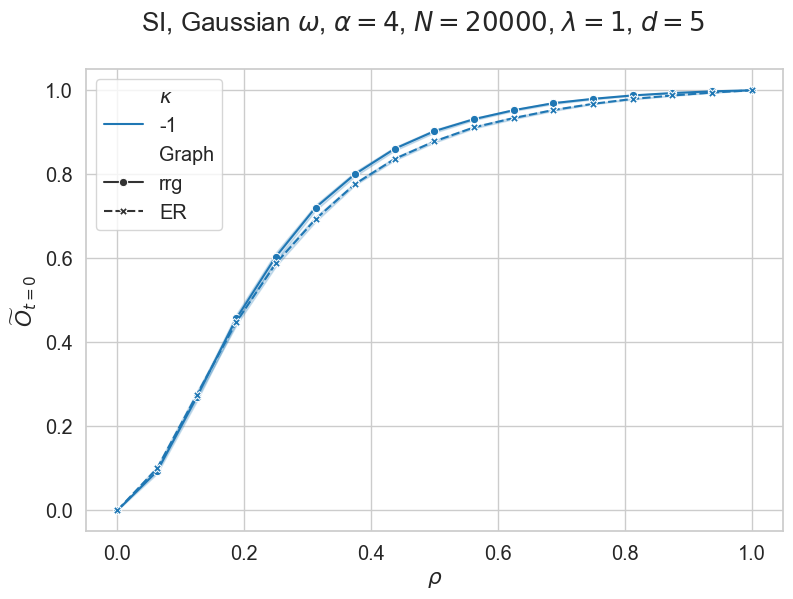

In [7]:
df = data_frame[data_frame[r"$d$"]==5].copy()
df["Graph"] = df["graph_type"]
df[r"$\kappa$"] = -df["c"].astype(int)

fig,ax = plt.subplots(1, 1, figsize=(9,6))
fig.suptitle(f"SI, Gaussian $\omega$, $\\alpha=4$, $N=20000$, $\lambda=1$, $d=5$")
sns.lineplot(data=df[df["c"]==1], x=r"$\rho$", y=r"$\widetilde{O}_{t=0}$", hue=r"$\kappa$", markers=True, errorbar=("ci", 99), style="Graph", palette="tab10")

In [8]:
#Create new column in df, if "graph" is rrg, then "RRG", else "ER"
df["Graph"] = df["Graph"].apply(lambda x: "RRG" if x == "rrg" else "ER")

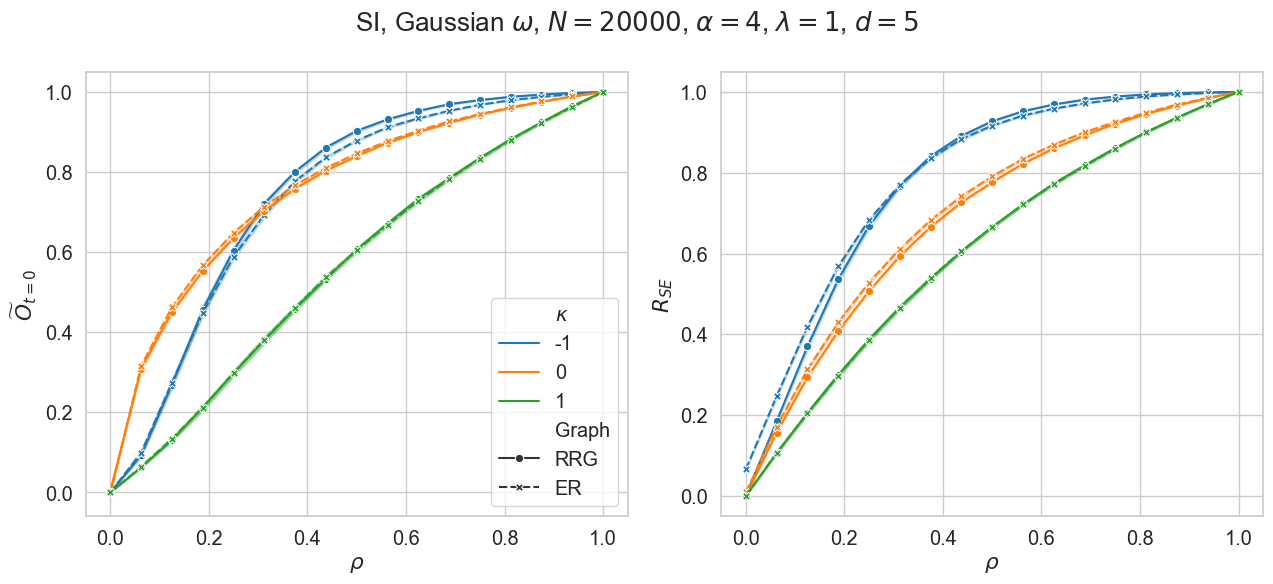

In [9]:
# same plot as before, but 2 x 1 with on the right the MSE 

fig, axs = plt.subplots(1, 2, figsize=(13,6))
fig.suptitle(f"SI, Gaussian $\omega$, $N=20000$, $\\alpha=4$, $\lambda=1$, $d=5$")
sns.lineplot(data=df, x=r"$\rho$", y=r"$\widetilde{O}_{t=0}$", hue=r"$\kappa$", markers=True, errorbar=("ci", 99), style="Graph", palette="tab10", ax=axs[0])
sns.lineplot(data=df, x=r"$\rho$", y=r'$R_{SE}$', hue=r"$\kappa$", markers=True, errorbar=("ci", 99), style="Graph", palette="tab10", ax=axs[1], legend=False)
plt.tight_layout()

fig.savefig(f"../Plots/Figure13.pdf")
